## 1. Data 
Dans ce laboratoire, nous examinerons plusieurs corpus du projet de dépendance universelle. 
Le projet UD vise à fournir des annotations grammaticales pour un large éventail de langues (il contient des corpus pour plus de 70 langues dans sa dernière version). 
Les ﬁchiers que nous allons utiliser peuvent être téléchargés à partir du site Web de la conférence. 
La figure 1 montre un exemple du format de test utilisé dans le projet UD. 
Dans le reste de cet atelier, nous utiliserons les caractéristiques suivantes de ce format: 
• des lignes vides marquent les limites des phrases; <br>
• les lignes commençant par un pointu doivent être ignorées;<br> 
• chaque ligne décrit un mot de la phrase; les informations sur ce mot sont stockées dans des colonnes séparées par des tabulations; <br>
• les lignes dans lesquelles la première colonne contient un trait d'union doivent être ignorées; <br>
• la quatrième colonne contient l’étiquette Part-of-Speech du mot: le mot est un verbe si sa PoS est VERB ou AUX; <br>
• la septième colonne peut être utilisée pour identifier des verbes et des constructions passives: si sa valeur contient "nsubj", il y a un verbe dans la phrase, si sa valeur est "nsubj: pass", la construction est à la voix passive.<br>
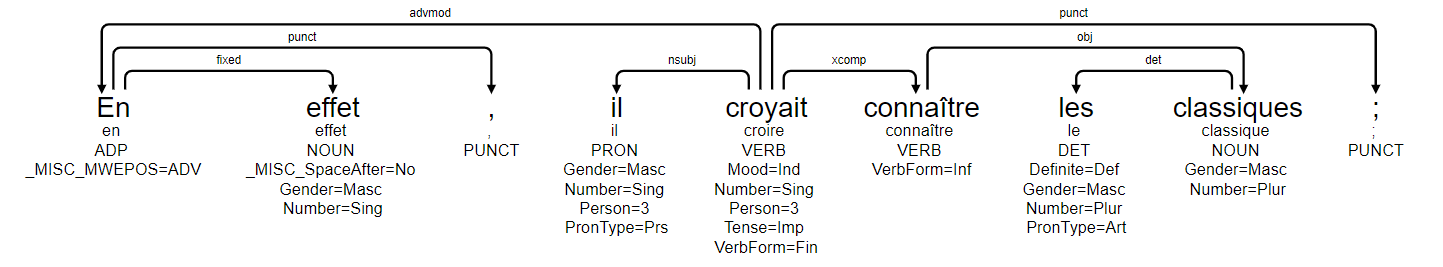


La version 2.4 des données UD_French-GSD comprend 400 387 mots (16 342 phrases). L'identifiant des phrases étaient disponible dans la ressource d' origine, si nouveau sent_id ont été automatiquement introduit dans le corpus converti avec des préfixes fr-ud-train, fr-ud-dev et fr-ud-test sur les fichiers originaux correspondants, suivi d'un numéro à 5 chiffres suivant l'ordre des phrases.

Pour répondre aux exigences de taille des données de test de 10K mots, une partie du fichier de développement original a été déplacée dans le fichier de test! Depuis la version 2.0, le fractionnement des données est:<br>
• fichier fr-ud-train.conll: <b>14 450 phrases</b>; <b>354 655 mots</b>
        - fr-ud-train_00001 à fr-ud-train_14554
• fichier fr-ud-dev.conll: <b>1 478 phrases</b>; <b>35 714 mots</b>
        - fr-ud-dev_00001 à fr-ud-dev_01478
• fichier fr-ud-test.conll: <b>416 phrases</b>; <b>10.018 mots</b>
        - fr_ud-test_00001 à fr_ud-test_00298
        - fr-ud-dev_01479 à fr-ud-dev_01596

Les phrases sont mélangées et il n'y a aucun moyen de savoir quelle est la source ou le genre d'une phrase donnée.
Probablement à cause d'un bogue dans un programme de conversion, la version 1.2 contient de nombreuses phrases tronquées (date manquante par exemple). Presque toutes les phrases tronquées proviennent de Wikipedia, il était donc possible de récupérer le texte original. La plupart des phrases tronquées ont été complétées dans la version 1.3. Certaines phrases ont été complétées plus tard. Il y a probablement encore des phrases tronquées.
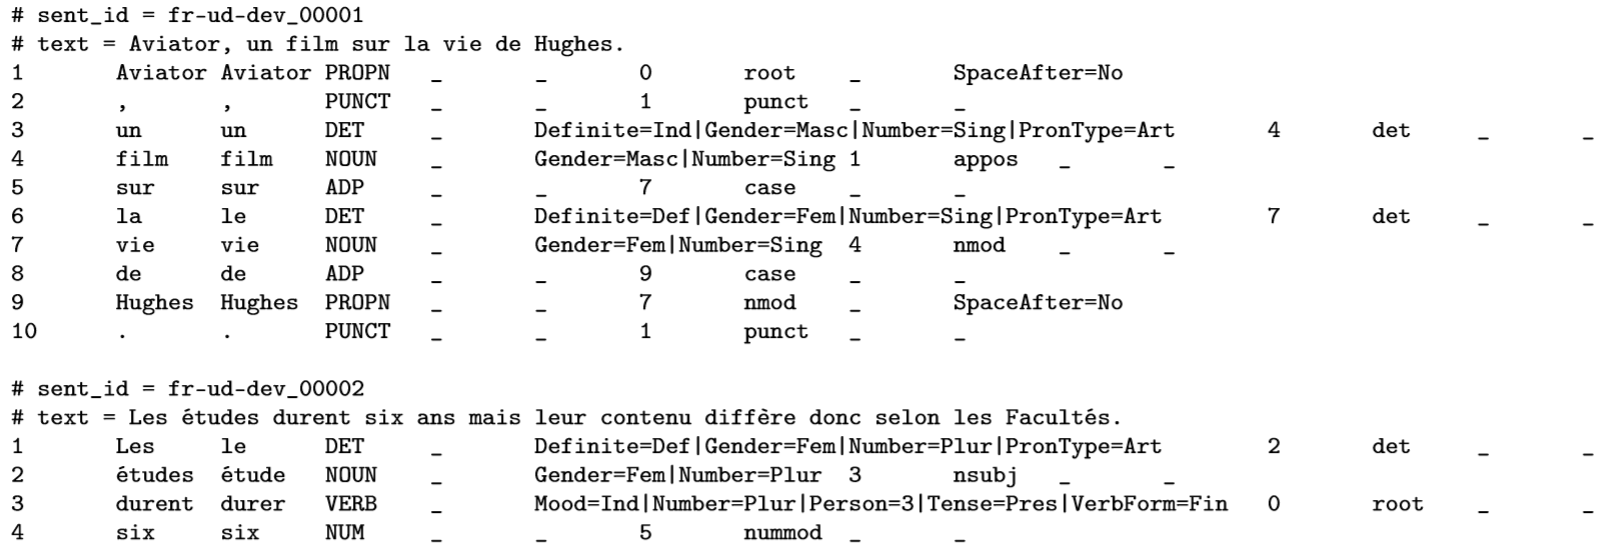

### Charger les données

In [ ]:
dataSet_train = "data/fr_gsd-ud-train.conllu"
dataSet_test = "data/fr_gsd-ud-test.conllu"
dataSet_dev = "data/fr_gsd-ud-dev.conllu"

### Ecrivez une fonction qui retourne le nombre de mots du corpus GSD (c'est-à-dire le nombre de TOKEN).

In [46]:
def countToken(data):
    n = 0
    for line in open(data, "r"):

        if line.startswith("#"):
            continue

        if "-" in line.split("\t")[0]:
            continue

        if not line.strip():
            continue
        n =+1
    return n 

print("le nombre de token (standard version) est: ", countToken(dataSet_train))

le nombre de token (standard version) est:  1


In [47]:
def countToken_py(data):
    return sum(1 for line in open(data, "r") if not any([\
                                                                             line.startswith("#"),
                                                                             "-" in line.split("\t")[0],
                                                                             not line.strip()]))

#nbToken = getTotalToken_py(dataSet_train)
print("le nombre de token (pythonic version) TRAIN est:", countToken_py(dataSet_train))
print("le nombre de token (pythonic version) DEV est:", countToken_py(dataSet_dev))
print("le nombre de token (pythonic version) TEST est:", countToken_py(dataSet_test))

le nombre de token (pythonic version) TRAIN est: 354699
le nombre de token (pythonic version) DEV est: 8071
le nombre de token (pythonic version) TEST est: 6950


### 2. Écrivez une fonction qui retourne le nombre de mots uniques (c'est-à-dire le nombre de types1)
<b>Conseil:</b> lors du développement / test de votre fonction, considérez un petit corpus composé d'une ou deux phrases afin de pouvoir définir manuellement la réponse attendue.

In [57]:
def countUnicWord(data):
    return len({line.split("\t")[1] for line in open(data, "r") if not any([\
                                                                             line.startswith("#"),
                                                                             "-" in line.split("\t")[0],
                                                                             not line.strip()])})
print("Nombre de mot unique pour la phrase1-TRAIN: ", countUnicWord(dataSet_train))
print("Nombre de mot unique pour la phrase1-DEV: ", countUnicWord(dataSet_dev))
print("Nombre de mot unique pour la phrase1-TEST: ", countUnicWord(dataSet_test))

Nombre de mot unique pour la phrase1-TRAIN:  42303
Nombre de mot unique pour la phrase1-DEV:  2706
Nombre de mot unique pour la phrase1-TEST:  2416


## 3. Probabilité
Estimation Cette section vise à estimer la probabilité qu'une phrase française soit écrite à la voix passive.
1. Ecrivez une fonction qui retourne une liste de toutes les phrases contenues dans un fichier de configuration.
2. Écrivez une fonction qui retourne le nombre de verbes dans une phrase et le nombre de verbes dans la forme passive
3. Calculez le rapport "nombre de constructions passives sur nombre de verbes" pour 5, 50, 100, 1 000, 5 000, 10 000, 20 000 et 50 000 phrases. Que pouvez-vous conclure?
4. Expliquez le code de la figure 2. 
En particulier:<br> 
• Que se passe-t-il à la ligne 12?<br> 
• Quel est le type de contenu?<br> 
• Que fait la ligne 14? <br>
Pourquoi utilisons-nous des crochets et non des parenthèses comme la ligne 12? <br>
• Expliquez les lignes 17 et 19.
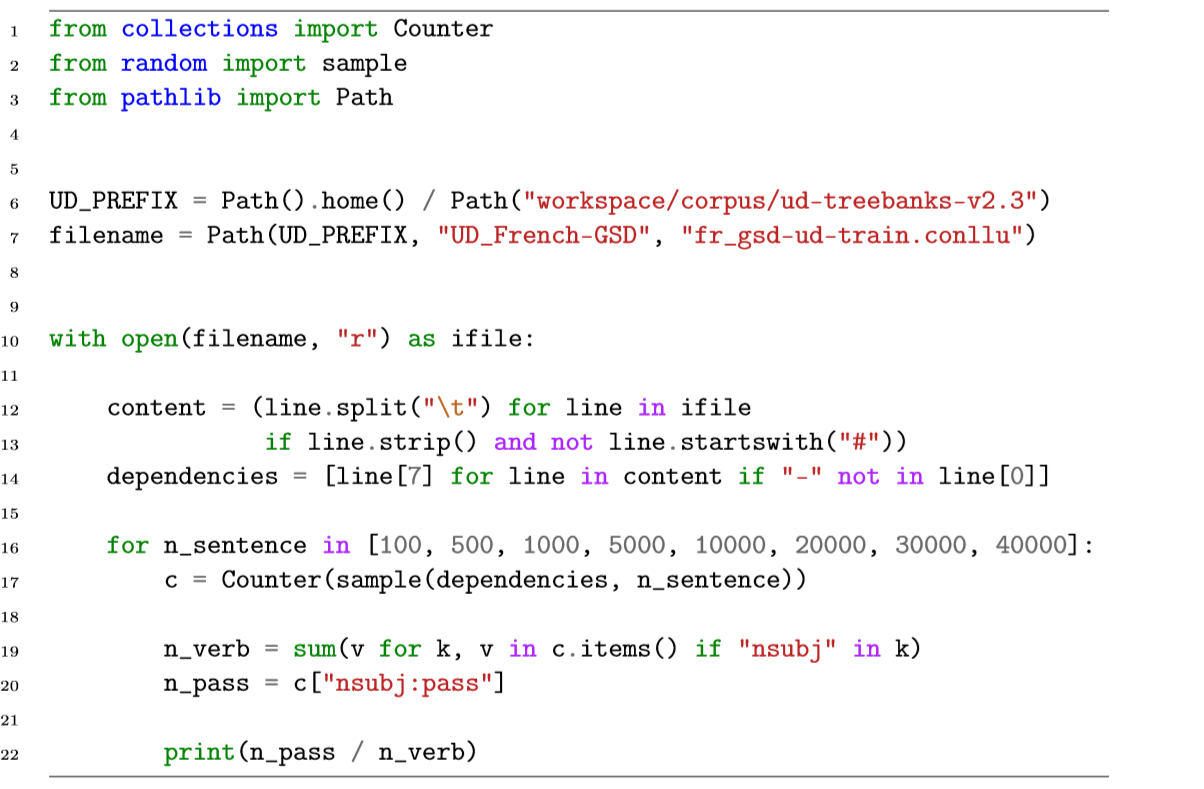

In [60]:
# Code da le figure 2 ci dessus.
from collections import Counter
from random import sample 
from pathlib import Path 
#UD_PREFIX = Path().home() / Path("workspace/corpus/ud-treebanks-v2.3")
#filename = Path(UD_PREFIX, "UD_French-GSD", "fr_gsd-ud-train.conllu")
filename = dataSet_train
with open(filename, "r") as ifile:
    content = (line.split("\t") for line in ifile
               if line.strip() and not line.startswith("#"))
    dependencies = [line[7] for line in content if "-" not in line[0]]
    for n_sentence in [100, 500, 1000, 5000, 10000, 20000, 30000, 40000]:
        c = Counter(sample(dependencies, n_sentence))
        n_verb = sum(v for k, v in c.items() if "nsubj" in k)
        n_pass = c["nsubj:pass"]
        print(n_pass / n_verb)


0.0
0.15384615384615385
0.1323529411764706
0.09863945578231292
0.10824742268041238
0.11426116838487972
0.116331096196868
0.11097099621689786


In [61]:
#Question 1
def read_sentences(infile):
# Notez que cette fonction lit tout le fichier en mémoire qui est     
# généralement pas une bonne idée (le fichier peut être très volumineux)
    data = infile.read()

    # do not return an empty sentence at the end of file
    return [d for d in data.split("\n\n") if d.strip()]

In [62]:
def stream_sentences(infile):
    data = []
    for line in infile:
        if not line.strip():
            yield "\n".join(data)
            data = []
            continue
        data.append(line.strip())
    if data:
        yield "\n".join(data)

In [73]:
print(f"#sentences: {len(read_sentences(open('data/fr_gsd-ud-train.conllu'))):,}")

#sentences: 14,450


In [77]:
assert read_sentences(open(dataSet_train))[0] == next(stream_sentences(open(dataSet_train, "r")))
assert read_sentences(open(dataSet_train))[-1] == list(stream_sentences(open(dataSet_train, "r")))[-1]

s = read_sentences(open(dataSet_train))[0]
print(s)

# sent_id = fr-ud-train_00001
# text = Les commotions cérébrales sont devenu si courantes dans ce sport qu'on les considére presque comme la routine.
1	Les	le	DET	_	Definite=Def|Gender=Fem|Number=Plur|PronType=Art	2	det	_	_
2	commotions	commotion	NOUN	_	Gender=Fem|Number=Plur	5	nsubj	_	_
3	cérébrales	cérébral	ADJ	_	Gender=Fem|Number=Plur	2	amod	_	_
4	sont	être	AUX	_	Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin	5	aux	_	_
5	devenu	devenir	VERB	_	Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part	0	root	_	Correct=devenues
6	si	si	ADV	_	_	7	advmod	_	_
7	courantes	courant	ADJ	_	Gender=Fem|Number=Plur	5	xcomp	_	_
8	dans	dans	ADP	_	_	10	case	_	_
9	ce	ce	DET	_	Gender=Masc|Number=Sing|PronType=Dem	10	det	_	_
10	sport	sport	NOUN	_	Gender=Masc|Number=Sing	7	obl:mod	_	_
11	qu'	que	SCONJ	_	_	14	mark	_	SpaceAfter=No
12	on	on	PRON	_	Gender=Masc|Number=Sing|Person=3	14	nsubj	_	_
13	les	le	PRON	_	Number=Plur|Person=3|PronType=Prs	14	obj	_	_
14	considére	considérer	VERB	_	Mood=Ind|Number=Sing|Per

In [66]:
# Question 2: number of verbs and passive verbs in the sentence
def count_verbs(sentence):
    c = Counter(line.split("\t")[7] for line in sentence.split("\n") if not any([\
                                                                                 line.startswith("#"),
                                                                                 "-" in line.split("\t")[0]]))

    return sum(v for k, v in c.items() if "nsubj" in k), c["nsubj:pass"]

In [78]:
#print("Le nombre de verbe par phrase: "count_verbs(s)